# Atividade 2 - Cálculo Numérico
Carlos Bravo - 119136241

## Imports

In [1]:
using Plots
include("../lib.jl");

## Exercício 1 (2.1)

O Método de Newton é utilizado para aproximar as raízes de uma função. O método funciona da seguinte forma:
1. É "chutado" um valor inicial que, mesmo errado, está próximo do valor correto
2. É calculada a reta tangente nesse ponto
    * A reta tangente é uma aproximação da função no entorno do ponto
    * É mais fácil encontrar a raíz de uma reta que uma função arbitrária
3. É calculada a raíz da reta e aproximado como um chute melhor
4. Passos 2-3 são repetidos durante N vezes ou até chegar na margem de erro desejada

O passo chave desse método é o segundo, utilizar a reta tangente como uma fácil aproximação

Queremos encontrar $x = \sqrt[3]{43}$, o que podemos rearrumar para $x^3 - 43 = 0$. Essa organização é preferível, pois utilizando $f(x) = x^3 - 43$, podemos utilizar do método de Newton para encontrar a raíz. 

Além disso, será definido 20 iterações. Uma escolha arbitrária, mas um número de repetições suficiente para aproximar com algumas casas decimais de precisão.

Sobre o chute inicial, como $\sqrt[3]{43}$ está entre 3 e 4, 3.5 parece um bom chute.

Ficaram definidos os seguintes parâmetros:
 * $f(x) = x^3 - 43$
 * $f'(x) = 3x^2$
 * $x_0 = 3.5$
 * $n = 20$ 

In [2]:
f(x) = x^3-43 # Funcao
df(x) = 3x^2 # Derivada
x0 = 3.5 # Chute inicial
n = 20 # Numero de termos

raiz = newton_raphson(f, df, x0, n)
raiz

3.5033980603867243

In [3]:
# Conferindo margem de erro
raiz^3 - 43

7.105427357601002e-15

Como a precisão é de 15 casas decimais, o valor $3.5033980603867243$ é uma ótima aproximação de $\sqrt[3]{43}$.

Em qualquer chute inicial com passos o suficiente seria possível chegar nesse valor, no entanto há alguns valores iniciais que impedem o método de funcionar corretamente, um "chute problemático".

A definição do Método de Newton para calcular a aproximação $x_n$ é:
$$ x_n = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}$$

Podemos facilmente ver que essa fórmula "quebra" em um valor específico, quando $f'(x_{n-1}) = 0$. Como $f'(x) = 3x^2$, o único valor de $x$ que a função retorna 0 é quando $x=0$, dessa forma, não podendo ser um chute inicial. É possível ver que esse chute não nos leva a nenhum lugar substituindo na chamada do método:

In [4]:
newton_raphson(f, df, 0, n)

NaN

## Exercício 2  (2.2)

Para encontrar a função podemos aplicar a fórmula
$$ x_n = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}$$

Como alterna entre 2 valores, há 2 formas possíveis:
$$ 2 = 1 - \frac{f(1)}{f'(1)} \rightarrow \frac{f(1)}{f'(1)} = -1$$
$$ 1 = 2 - \frac{f(2)}{f'(2)} \rightarrow \frac{f(2)}{f'(2)} = 1$$

Como $f(x)$ é um polinômio de grau 2, podemos reescrever:
* $f(x) = ax^2 + bx + c$
* $f'(x) = 2ax + b$

Substituindo nas fórmulas encontradas obtemos as seguintes equações:
$$a+b+c=-(2a+b)$$
$$4a+2b+c=4a+b$$

Manipulando as 2 equações obtemos as seguintes condições, respectivamente:
1. $3a=c$
2. $b=-c$

Originalmente, tínhamos a equação $ax^2+bx+c$, substituindo os valores encontrados, obtemos $ax^2-3ax+3a$, que é a família de equações possíveis para satisfazer a condição. No entanto, tem uma condição implícita do fato de $f(x)$ ser um polinômio de segundo grau, que é $a \neq 0$. Assim, basta escolher outro valor, como por exemplo $a=1$.

Definindo $f(x)=x^2-3x+3$ e aplicando o método podemos ver que vai ficar alternando entre os valores:

In [5]:
f(x) = x^2 - 3x + 3
df(x) = 2x - 3;

In [6]:
1 - f(1)/df(1)

2.0

In [7]:
2 - f(2)/df(2)

1.0

Temos a condição de alternância, mas faltou a condição $x_0=1$. No entanto, isso se deve simplesmente ao fato de que $1$ foi o chute inicial, o que é um valor de livre escolha. 

Assim, se $f(x)$ for definida como anteriormente e o chute inicial for $1$, as condições estão satisfeitas.

## Exercício 3 (4.1)

A fórmula do Teorema de Taylor de ordem 1 é:
$$\left | f(x)-(f(a)+f'(a)(x-a)) \right | \leq \frac{M(x-a)^2}{2}$$
Ou, em português:

_O que você quer_ - _Uma aproximação disso_ $\leq$ _O quão errado pode estar_

Assim, podemos manipular a equação da seguinte forma:
$$\left | f(x)-f(a)-f'(a)(x-a) \right | \leq \frac{M(x-a)^2}{2}$$
$$\left | \frac{f(x)-f(a)}{x-a}-f'(a) \right | \leq \frac{M(x-a)}{2}$$
$$\left | f'(a)- \frac{f(x)-f(a)}{x-a} \right | \leq \frac{M(x-a)}{2}$$

* O que queremos: $f'(a)$
* Como aproximamos: $\frac{f(x)-f(a)}{x-a}$
* Erro máximo: $\frac{M(x-a)}{2}$

## Exercício 4 (4.2)

Para aproximar $sen(0.01)$ com erro de $10^{-6}$ podemos usar a fórmula de Taylor de ordem n. Primeiro, devemos encontrar em qual termo parar a aproximação, então precisamos encontrar em qual termo o erro é menor que o estipulado.

O erro do termo n é dado por $\frac{M(x-a)^{n+1}}{(n+1)!}$.
* Usando o termo conhecido $sen(0)=0$, temos que $x-a = 0.01$
* n é o que queremos descobrir
* M é um teto para a derivada $f^{(n+1)}(x)$. Como a derivada alterna entre {sen, cos, -sen, -cos}, podemos limitar todas as derivadas por 1

In [8]:
M = 1 # Teto para a derivada f^{(n+1)}
x = 0.01 # Ponto que queremos aproximar
a = 0 # Ponto proximo que conhecemos
for n = 0:10 # Percorre os 10 primeiros termos
    res = (M*(x-a)^(n+1))/factorial(n+1) # Calcula o erro correspondente
    println("$n → $res")
end

0 → 0.01
1 → 5.0e-5
2 → 1.666666666666667e-7
3 → 4.166666666666667e-10
4 → 8.333333333333335e-13
5 → 1.3888888888888892e-15
6 → 1.9841269841269846e-18
7 → 2.4801587301587306e-21
8 → 2.7557319223985896e-24
9 → 2.7557319223985897e-27
10 → 2.5052108385441727e-30


A partir dessa lista, encontramos que precisamos usar taylor de ordem 2 para obter o erro desejado. Agora, basta calcular a aproximação:
$$f(a) + f'(a)(x-a) + \frac{f''(a)(x-a)^2}{2}$$
* f(a) = sen(0) = 0
* f'(a) = cos(0) = 1
* f''(a) = -sen(0) = 0
* x - a = 0.01

In [9]:
0 + 1*(0.01) + 0*(0.01)^2/2

0.01

Assim, $sen(0.01) \approx 0.01$ com erro menor que $10^{-6}$

## Exercício 5 (4.3)

O Teorema de Taylor de Ordem n nos diz que a aproximação da função é dada por:
$$\sum_{n=0}\frac{f^{(n)}(a)(x-a)^n}{n!}$$
As derivadas da função $sen(x)$ irão alternar entre os seguintes valores:

0. sen(x)
1. cos(x)
2. -sen(x)
3. -cos(x)

Como queremos aproximar seno para um valor muito próximo de 0, teremos que $a=0$, porém isso implica duas consequências:

1. $f^{(2k)}(0) = 0$:

Toda derivada de ordem par aplicada em a será 0, pois $sen(0) = -sen(0) = 0$, então só precisamos nos preocupar com derivadas de ordem ímpar.

2. $(x-a) \approx 0$:

Como $x=0.01$ e $a=0$, $x-a = 10^{-2}$. Cada vez que aumentarmos a quantidade de termos, aumentaremos o expoente $n$, que aplicado em um valor pequeno retorna um valor menor ainda. Quando $n=1$, o termo possui ordem de $10^{-2}$. Mas quando $n=3$, a ordem vai para $10^{-6}$, deixando o erro muito baixo. 

Assim, qualquer ordem maior que $n=1$ já possui uma diferença muito pequena, assim como o erro quando $sen(x) \approx x$ 

## Exercício 6 (4.4)

(Discutido com Gabriele Jandres e Markson Arguello)

Para usar Taylor de terceira ordem precisamos definir os seguintes parâmetros:
* $x = 1.5$
* $a = 1$
* $f(a) = ln(1) = 0$
* $f^{(1)}(a) = \frac{1}{1} = 1$
* $f^{(2)}(a) = -\frac{1}{1} = -1$
* $f^{(3)}(a) = \frac{2}{1} = 2$
* $f^{(4)}(x) = -\frac{6}{x^4} \rightarrow M = 6$
    * Para $1 \leq x \leq 1.5$, temos que $|f^{(4)}(x)| \leq 6$ 
    
Substituindo os valores obtemos:

In [10]:
ln = 0.5 - (0.5)^2/2 + 2*(0.5)^3/6
erro = 6 * (0.5)^4/24
println("Aproximação: $ln\nErro: $erro")

Aproximação: 0.4166666666666667
Erro: 0.015625


Essa aproximação contém 1 dígito correto, ou seja, $0.4$. Para encontrar o erro faremos da mesma forma que anteriormente na questão 4.2. Mas antes, precisamos mudar o teto $M$. Por causa do termo polinomial, a n-ésima derivada possui o multiplicador $(n-1)!$, de resto ficando igual. Como o resto do termo é o mesmo, esse coeficiente será o nosso $M$:

In [11]:
for n = 1:25
    erro = (0.5)^(n+1) / (n+1)
    println("$n → $erro")
end

1 → 0.125
2 → 0.041666666666666664
3 → 0.015625
4 → 0.00625
5 → 0.0026041666666666665
6 → 0.0011160714285714285
7 → 0.00048828125
8 → 0.00021701388888888888
9 → 9.765625e-5
10 → 4.438920454545455e-5
11 → 2.0345052083333332e-5
12 → 9.390024038461539e-6
13 → 4.359654017857143e-6
14 → 2.0345052083333333e-6
15 → 9.5367431640625e-7
16 → 4.4878791360294117e-7
17 → 2.1192762586805554e-7
18 → 1.0038677014802631e-7
19 → 4.76837158203125e-8
20 → 2.270653134300595e-8
21 → 1.0837208140980114e-8
22 → 5.183012589164402e-9
23 → 2.483526865641276e-9
24 → 1.1920928955078125e-9
25 → 5.73121584378756e-10


Seguindo essa tabela, o polinômio deve conter então 22 termos para que o erro seja menor que $10^{-8}$

## Exercício 7 (4.5)

A implementação se encontra no arquivo _lib.jl_, o método _taylor\_ln_. O valor pedido e o erro podem ser modificados nas variáveis abaixo:

In [12]:
x = 1.5
erro = 1e-8

taylor_ln(x, erro)

0.40546510460350027

## Exercício 8 (4.6)

Podemos expressar seno da seguinte forma usando o Teorema de Taylor:
$$sen(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - ...$$
O termo $x$ irá desaparecer com o termo $-x$ do limite. Os expoentes irão ser subtraídos em $3$ por causa do denominador do limite. Assim, o que sobra é:
$$lim_{x \rightarrow 0}\left (-\frac{1}{3!} + \frac{x^2}{5!} - ...\right )$$
Substituindo x por 0, todos os termos irão sumir exceto pelo primeiro, sobrando apenas $-\frac{1}{3!}$, então o limite é igual a $-\frac{1}{6}$

## Exercício 9 (4.7)

Primeiro definiremos as funções $cos$ e suas seguintes aproximações no Teorema de Taylor quando $a = 0$

In [13]:
f(x) = cos(x)
t1(x) = 1
t2(x) = t1(x) - x^2/factorial(2)
t3(x) = t2(x) + x^4/factorial(4)
t4(x) = t3(x) - x^6/factorial(6)
t5(x) = t4(x) + x^8/factorial(8);

Agora é fazer o gráfico

In [14]:
gr()
theme(:dark)
x = range(-7, 7, length=100)
y = f.(x)
;

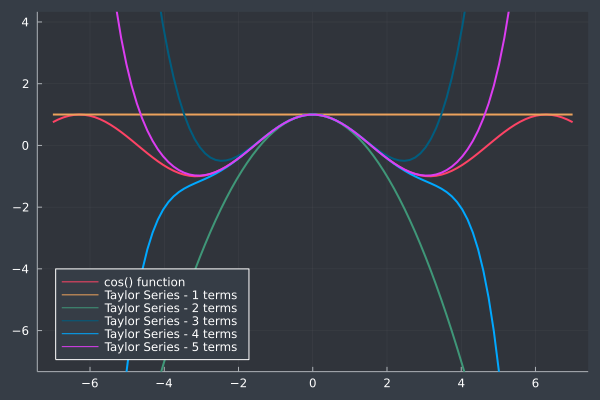

In [18]:
plot(x, y, ylim=[-7,4], label="cos() function", legend=:bottomleft, lw=2, xticks=-6:2:6, yticks=-6:2:4)
plot!(x, t1.(x), label="Taylor Series - 1 terms", lw=2)
plot!(x, t2.(x), label="Taylor Series - 2 terms", lw=2)
plot!(x, t3.(x), label="Taylor Series - 3 terms", lw=2)
plot!(x, t4.(x), label="Taylor Series - 4 terms", lw=2)
plot!(x, t5.(x), label="Taylor Series - 5 terms", lw=2)